# Dataset and packages import

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("../Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
pd.set_option('display.max_columns',None)
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [5]:
df[["EmployeeCount"]].value_counts()

EmployeeCount
1                1470
Name: count, dtype: int64

In [6]:
df[["Over18"]].value_counts()

Over18
Y         1470
Name: count, dtype: int64

In [7]:
df[["StandardHours"]].value_counts()

StandardHours
80               1470
Name: count, dtype: int64

In [52]:
df[["WorkLifeBalance"]].value_counts()

WorkLifeBalance
3                  893
2                  344
4                  153
1                   80
Name: count, dtype: int64

In [8]:
df.drop(["EmployeeNumber","EmployeeCount","Over18","StandardHours"], axis = 1, inplace = True)

In [51]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


# Data cleaning

#### Handling duplicated data 

In [9]:
df.duplicated().sum()

0

#### Handling missing values 

In [10]:
df.isna().all().sum()

0

#### Handling outliers

In [11]:
numerical_features = df.select_dtypes('int').columns

In [12]:
numerical_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_8028\1967678669.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


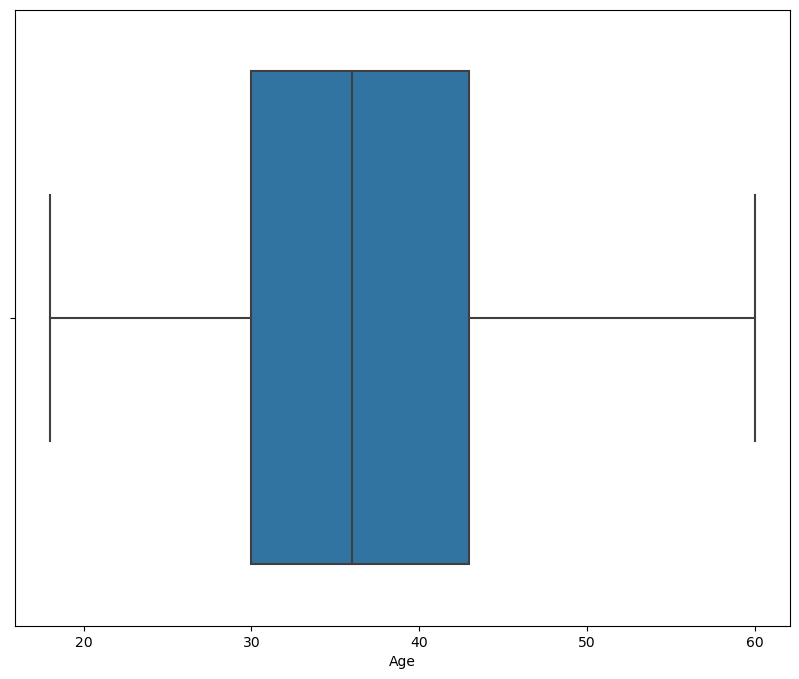

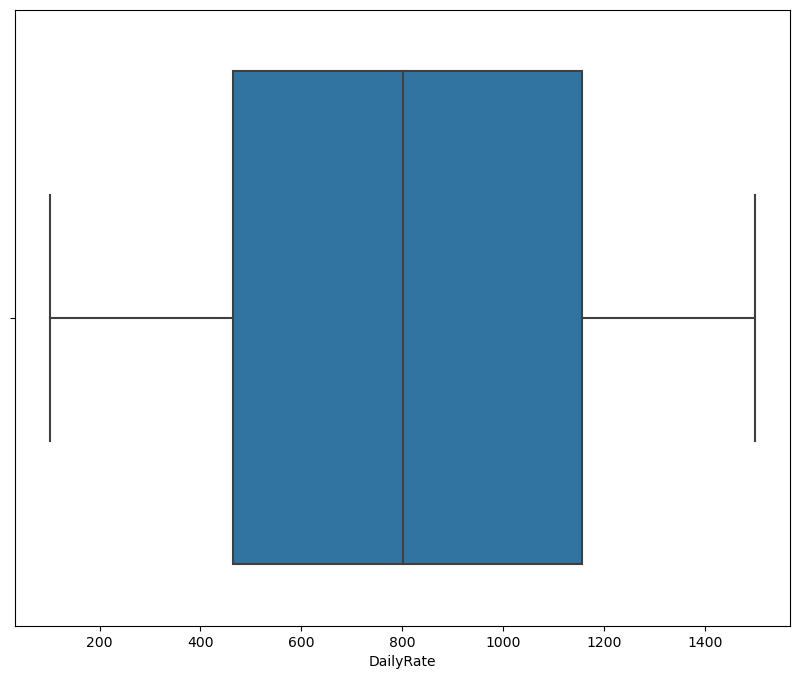

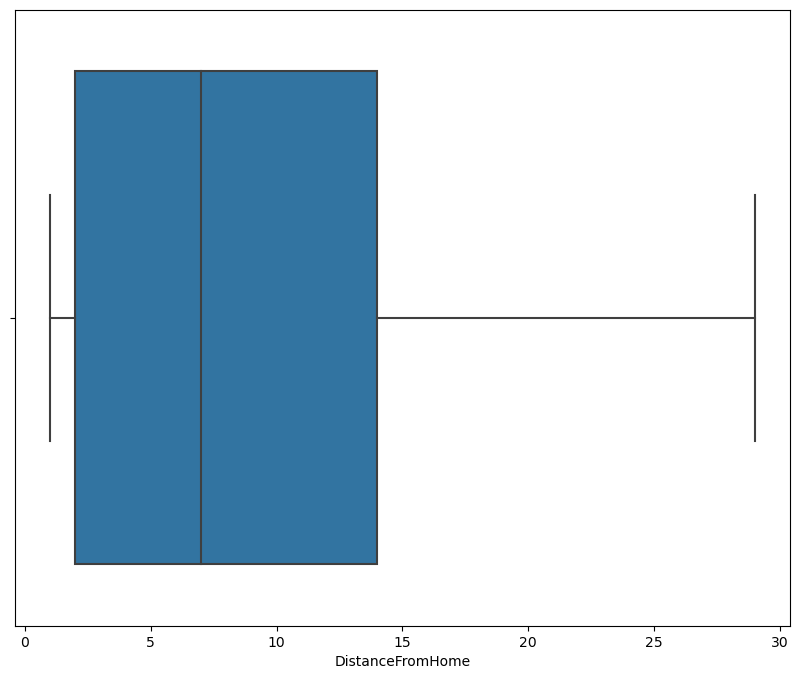

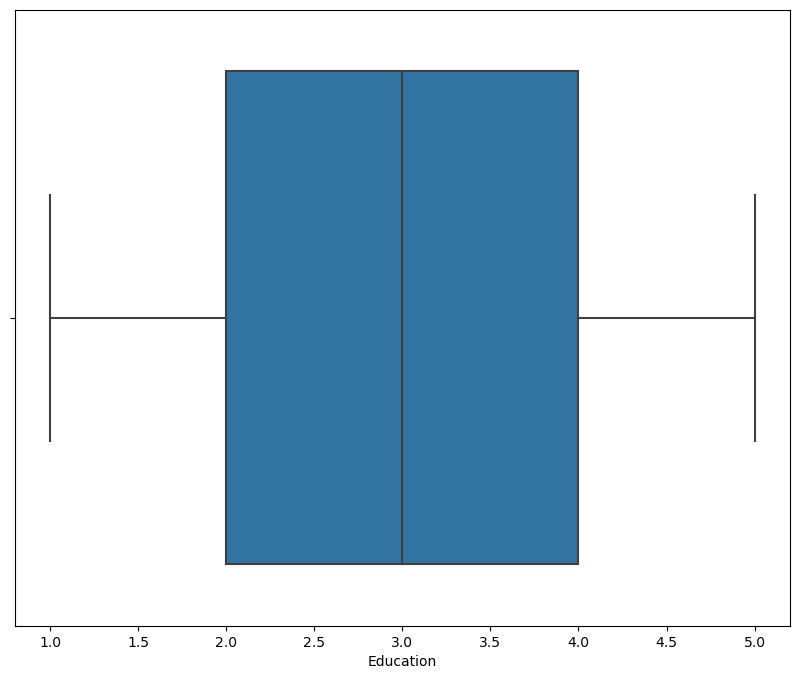

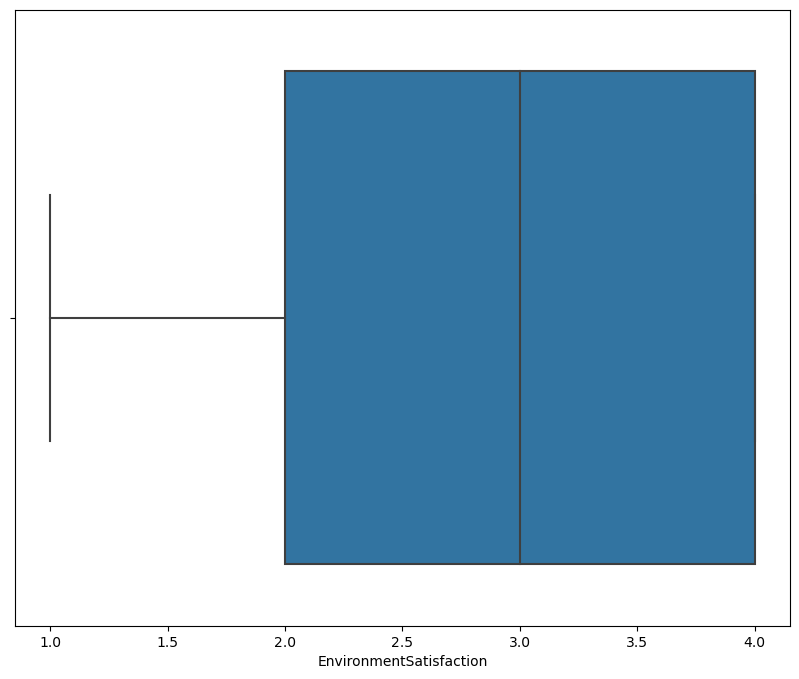

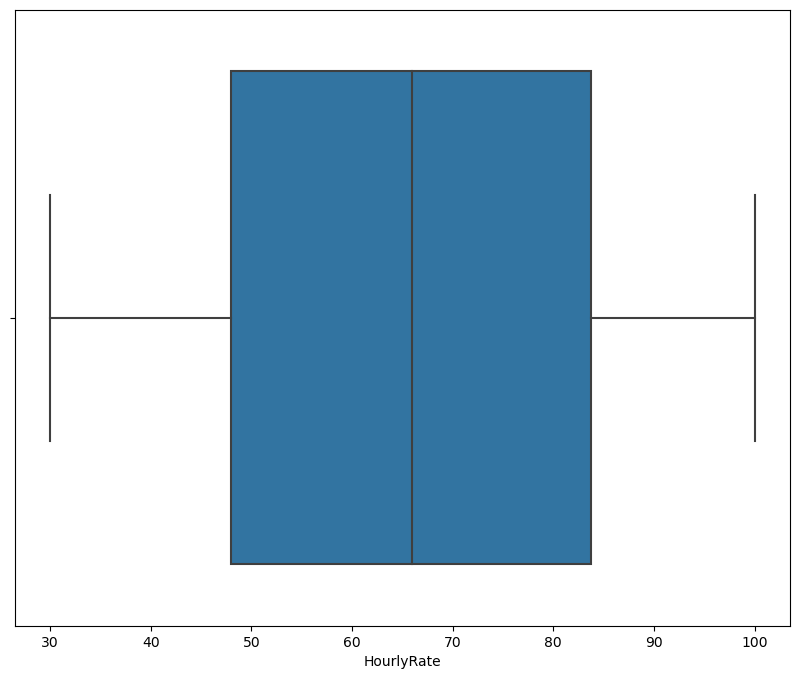

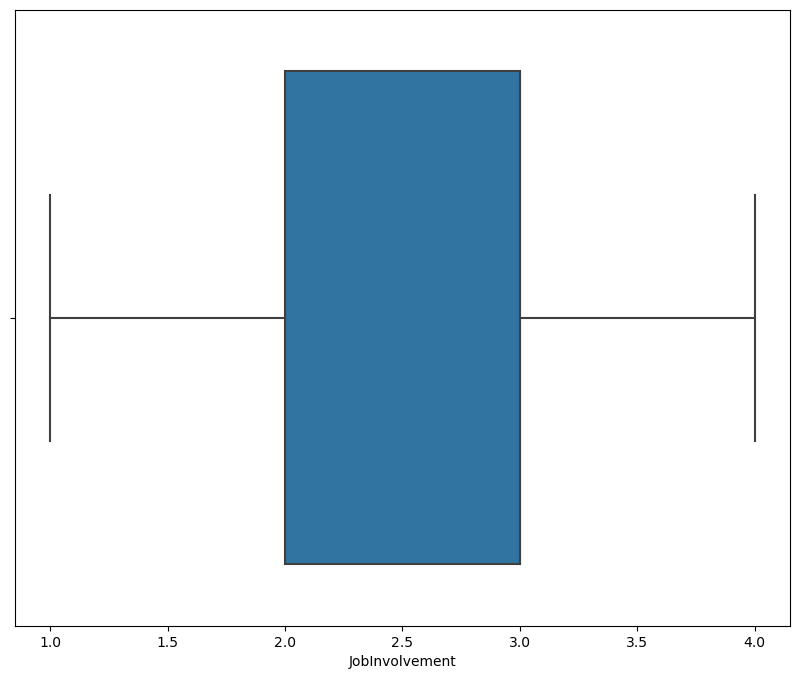

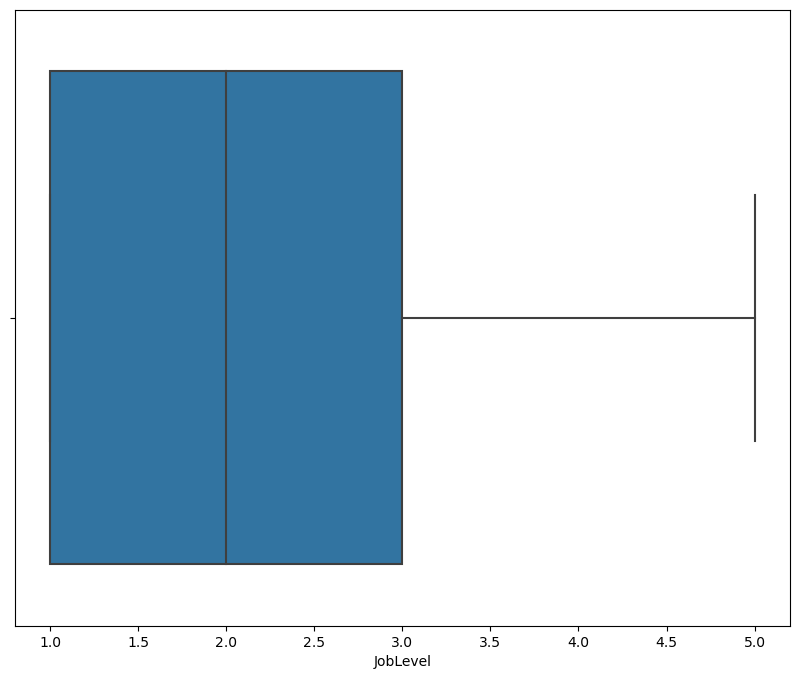

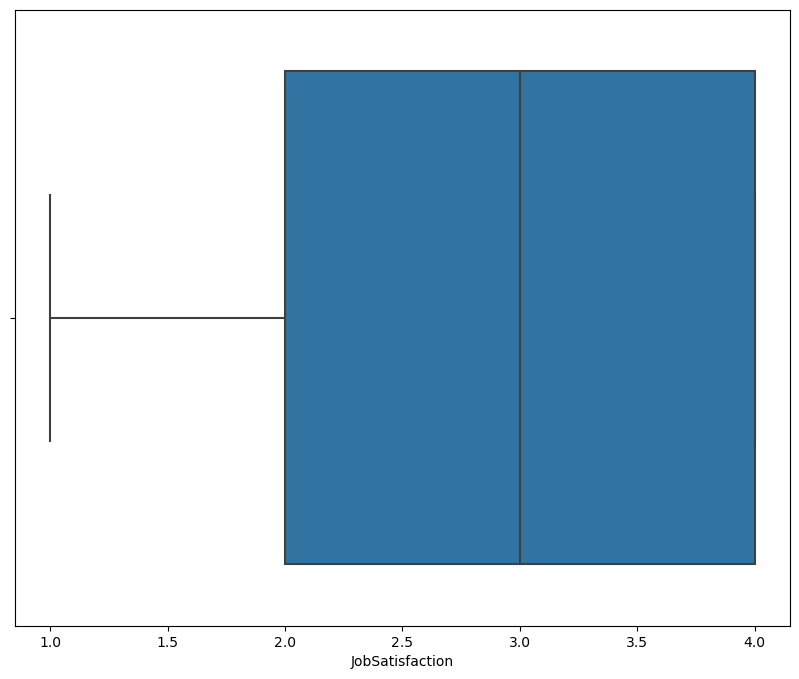

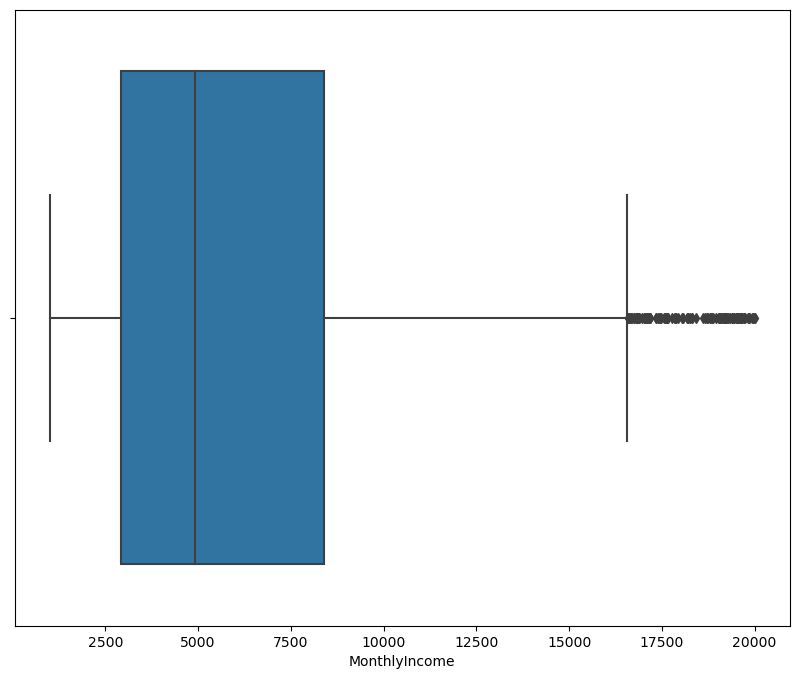

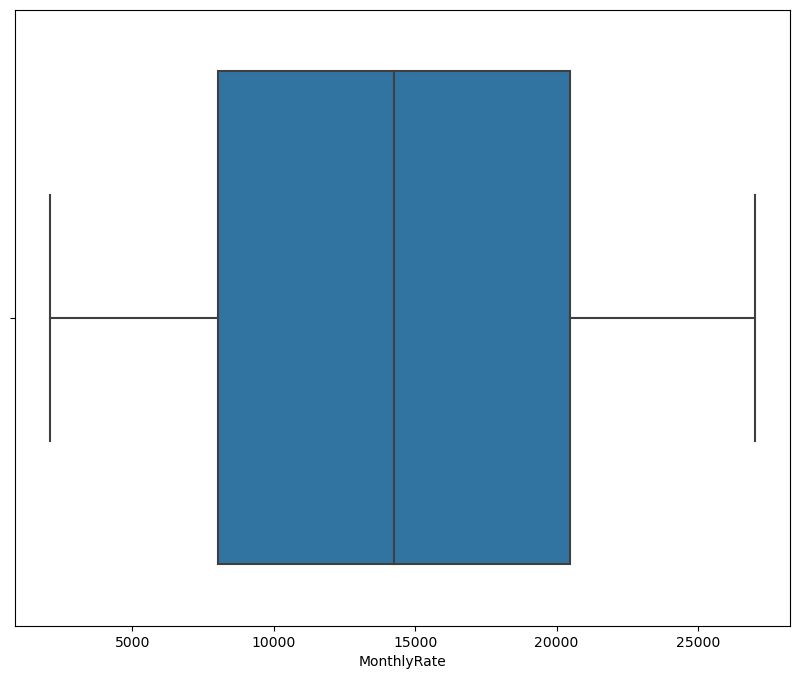

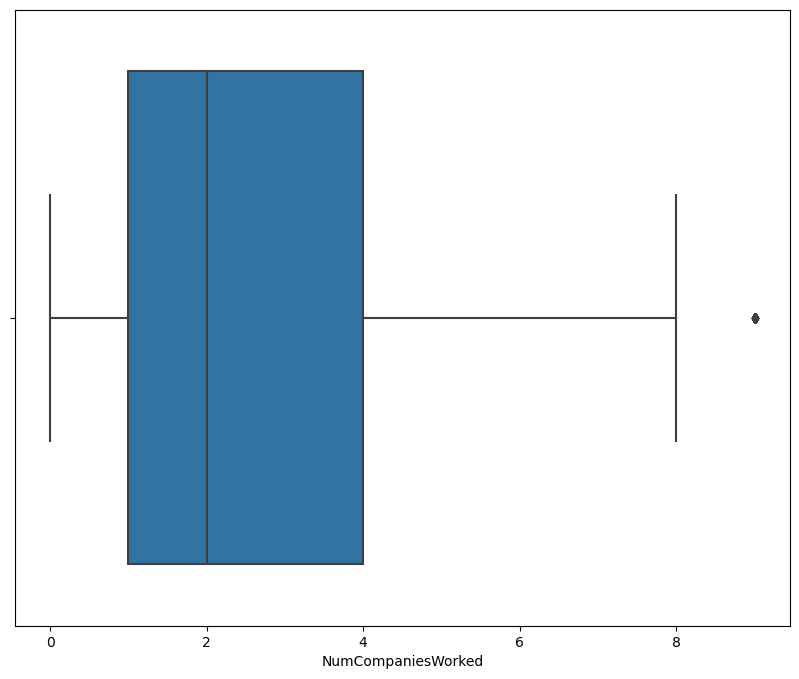

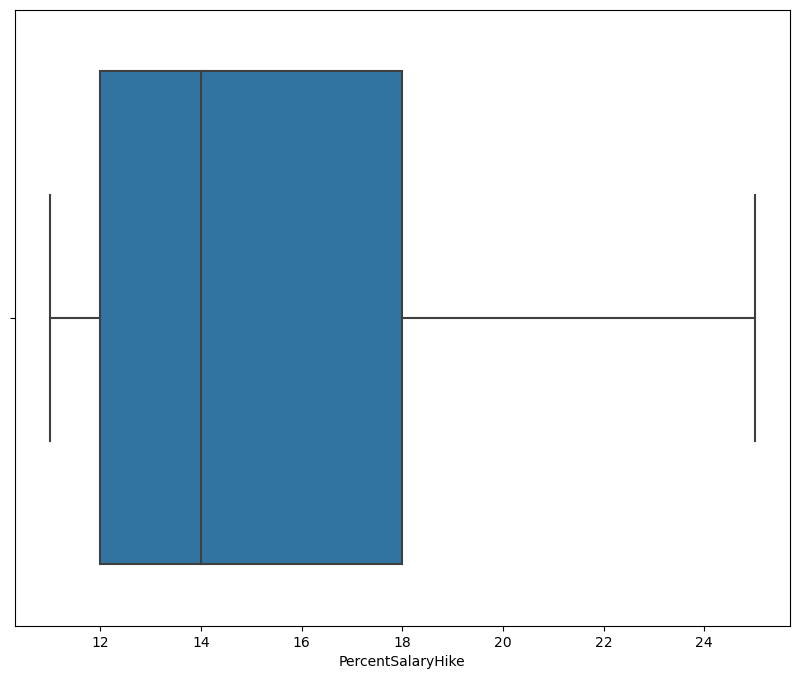

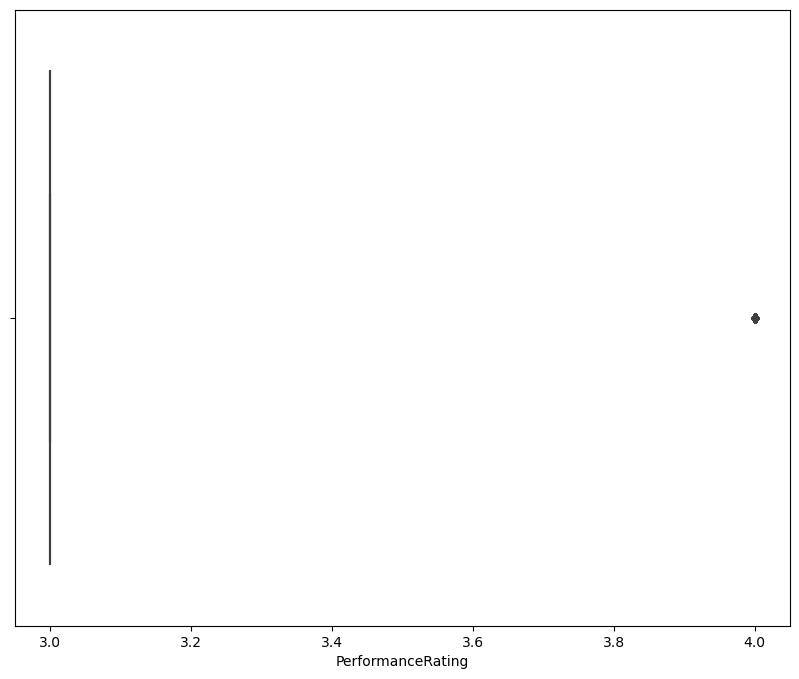

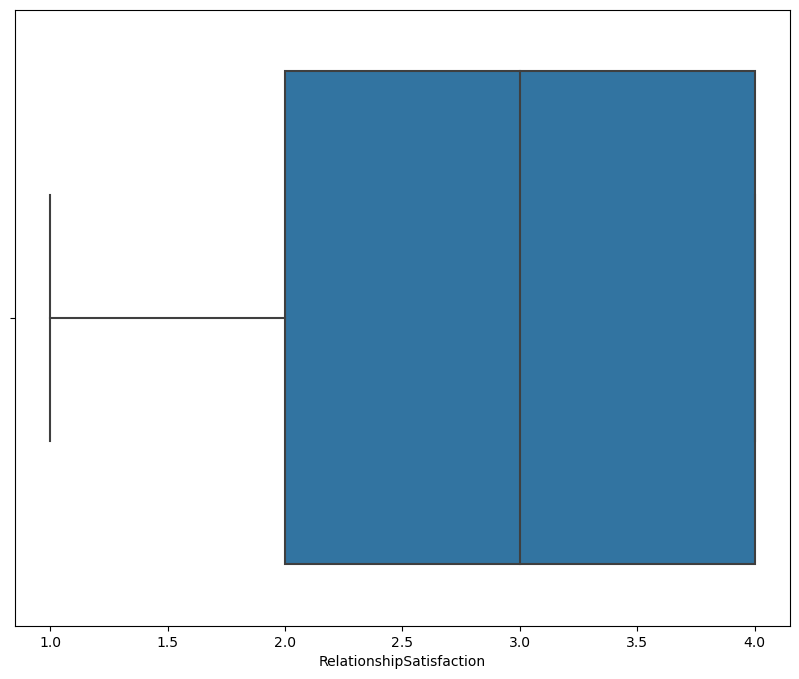

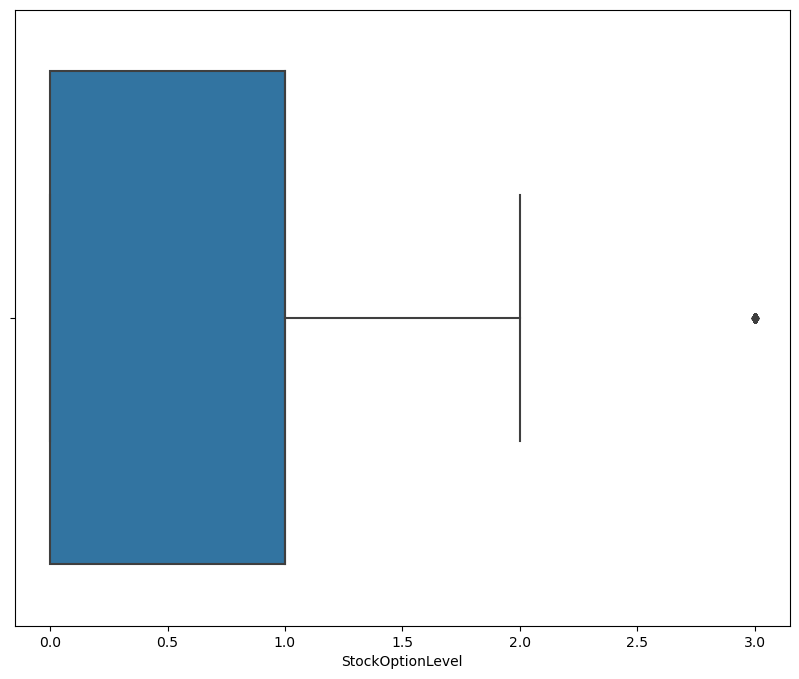

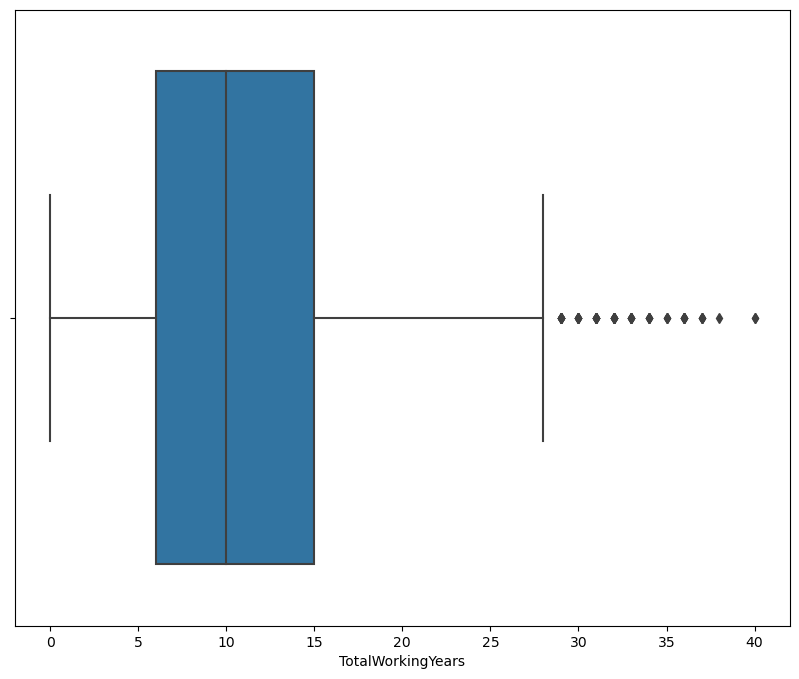

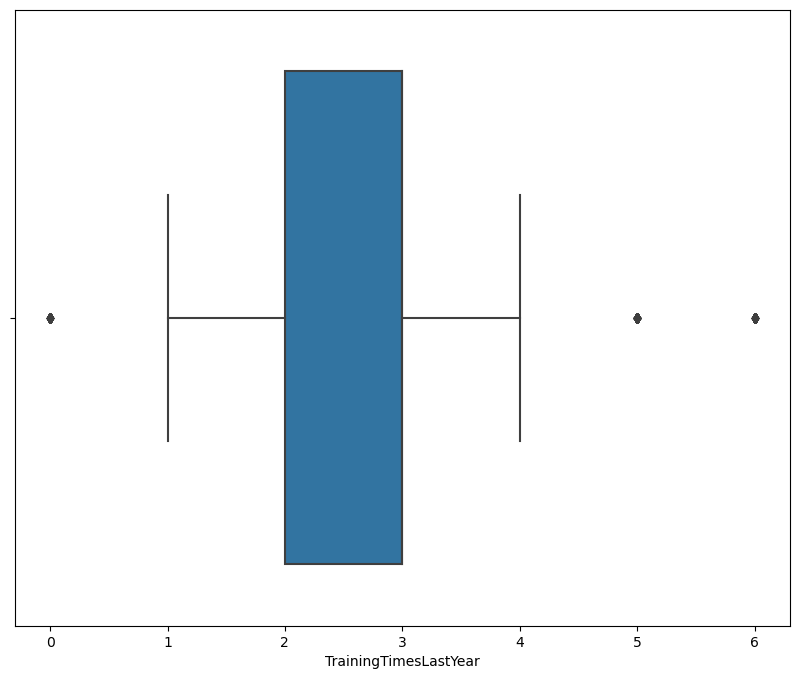

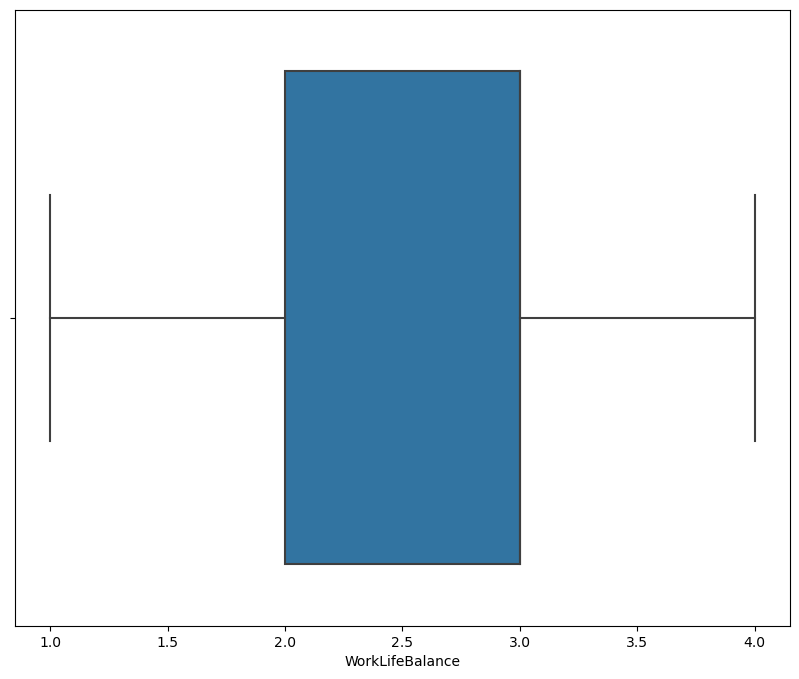

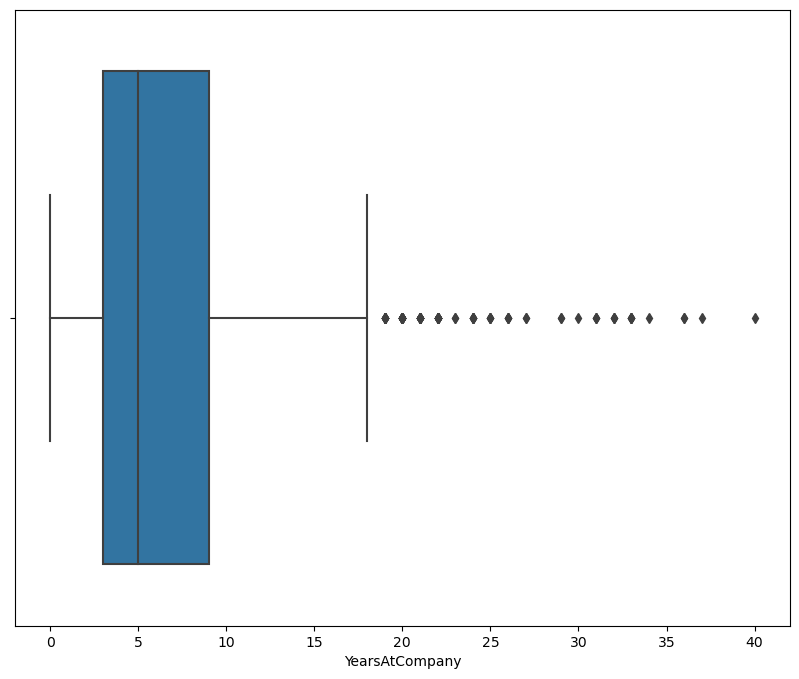

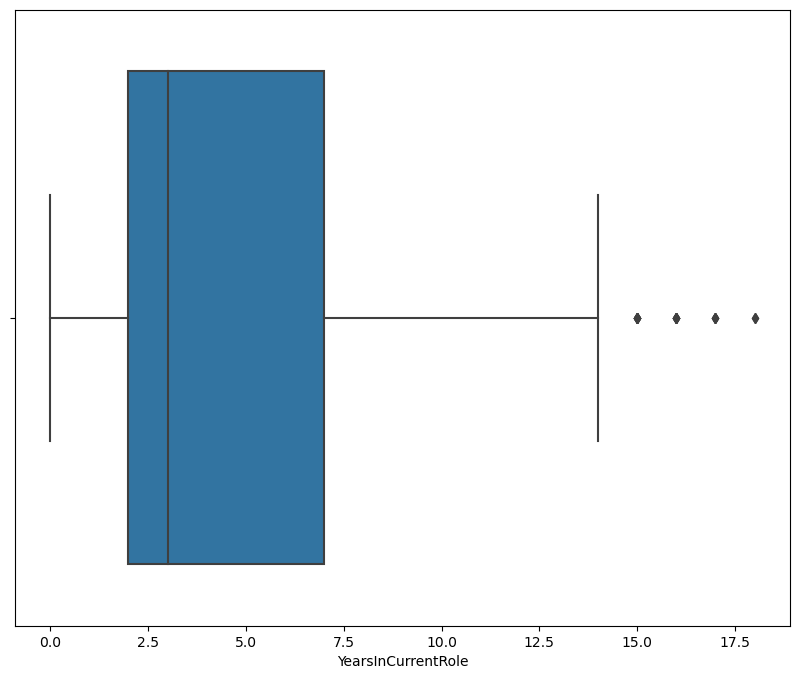

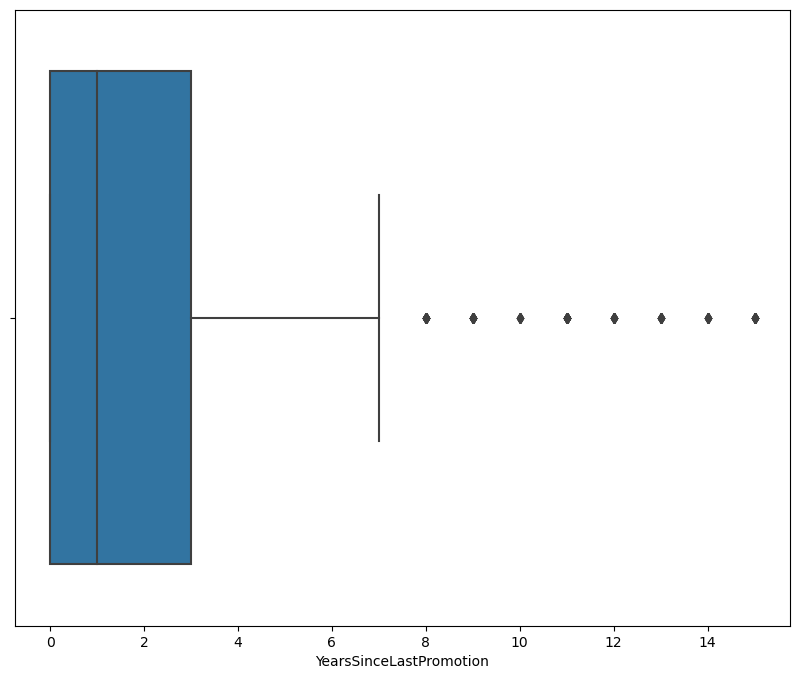

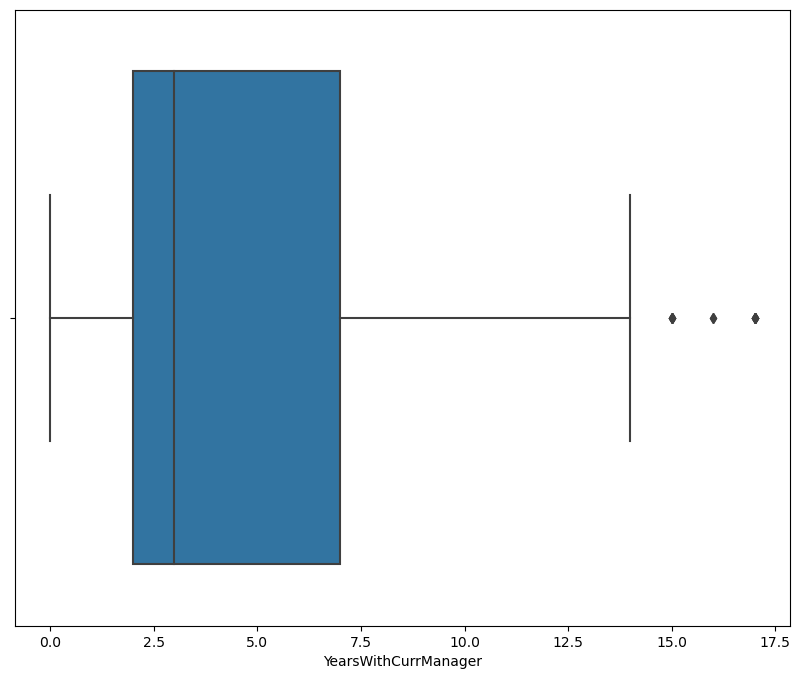

In [13]:
for col in numerical_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x = df[col])

In [14]:
outli_feat = ["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\si

<Figure size 1000x800 with 0 Axes>

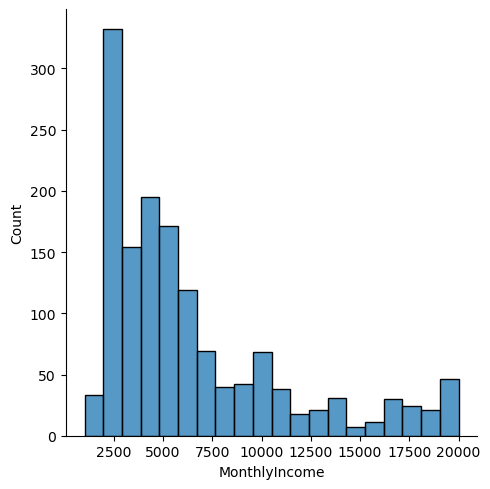

<Figure size 1000x800 with 0 Axes>

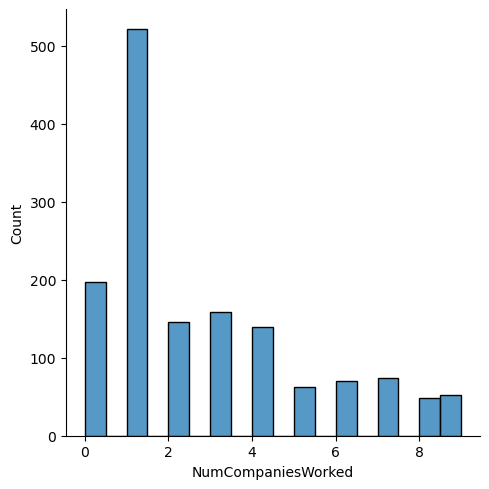

<Figure size 1000x800 with 0 Axes>

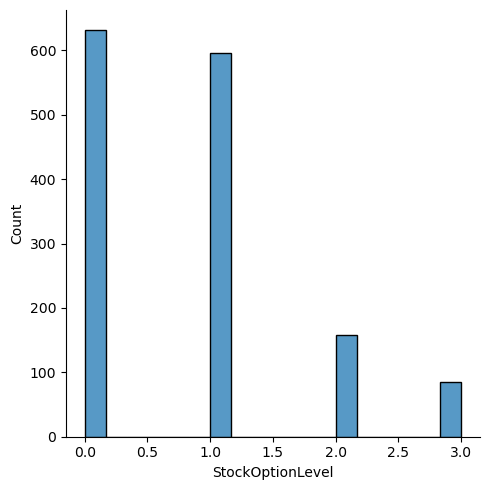

<Figure size 1000x800 with 0 Axes>

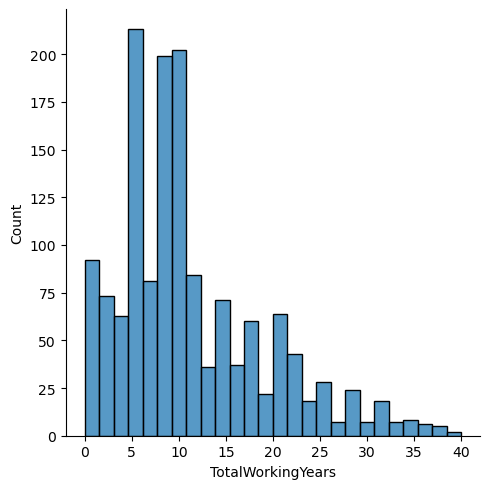

<Figure size 1000x800 with 0 Axes>

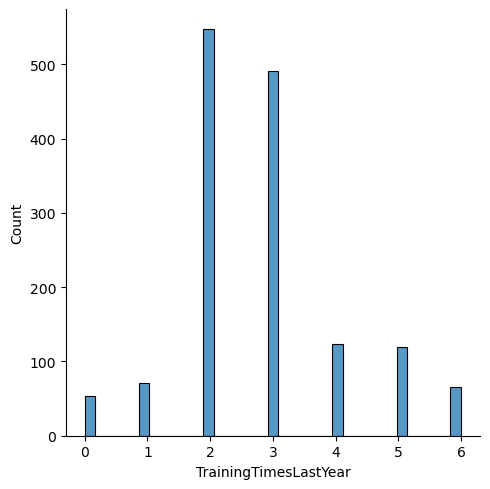

<Figure size 1000x800 with 0 Axes>

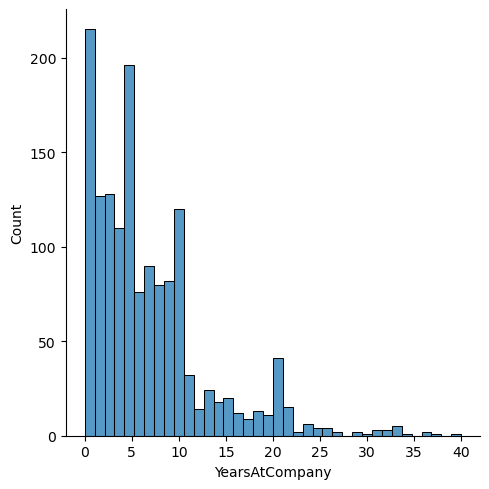

<Figure size 1000x800 with 0 Axes>

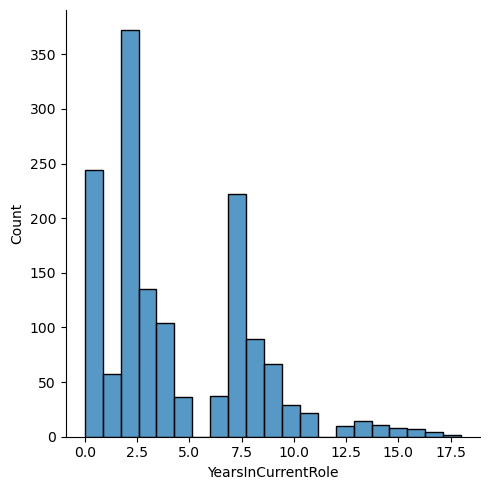

<Figure size 1000x800 with 0 Axes>

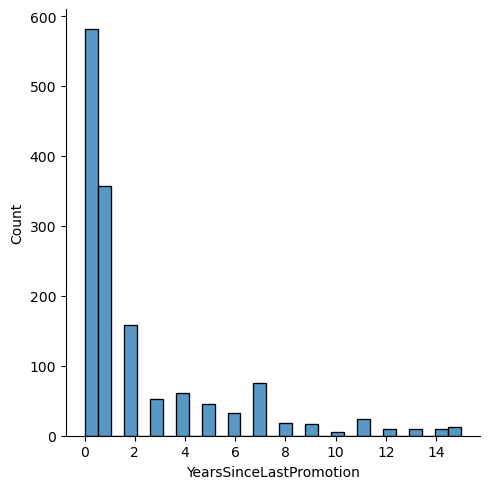

<Figure size 1000x800 with 0 Axes>

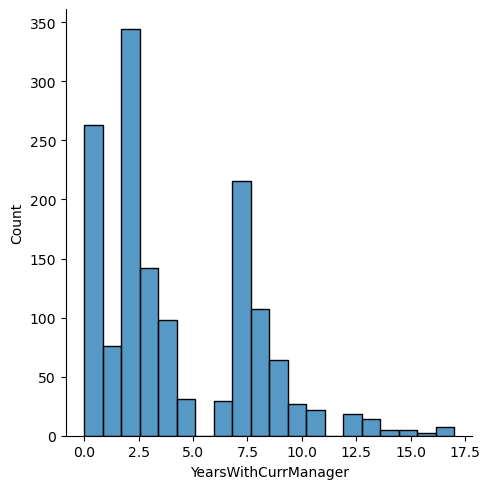

In [15]:
for col in outli_feat:
    plt.figure(figsize=(10,8))
    sns.displot(data = df, x = col)

In [16]:
z_scores = stats.zscore(df[outli_feat])

In [17]:
(abs(z_scores)>3).sum()

MonthlyIncome               0
NumCompaniesWorked          0
StockOptionLevel            0
TotalWorkingYears          16
TrainingTimesLastYear       0
YearsAtCompany             25
YearsInCurrentRole         13
YearsSinceLastPromotion    42
YearsWithCurrManager       14
dtype: int64

In [18]:
z_scores_bool = abs(z_scores)<3

In [19]:
z_scores_bool

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1465,True,True,True,True,True,True,True,True,True
1466,True,True,True,True,True,True,True,True,True
1467,True,True,True,True,True,True,True,True,True
1468,True,True,True,True,True,True,True,True,True


In [20]:
z_scores_numeric = z_scores_bool.astype(int)

<Axes: >

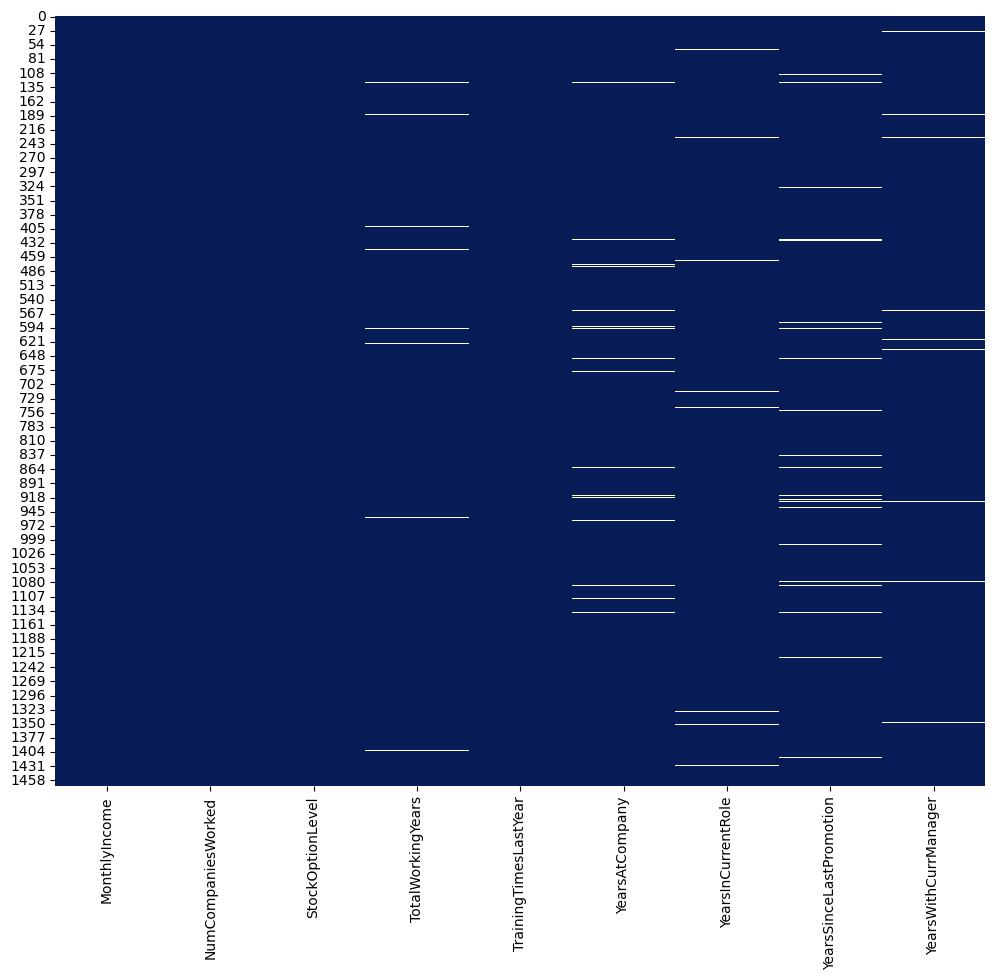

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(z_scores_numeric, cmap="YlGnBu", cbar=False)

In [22]:
outli_feat_2 = ["TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

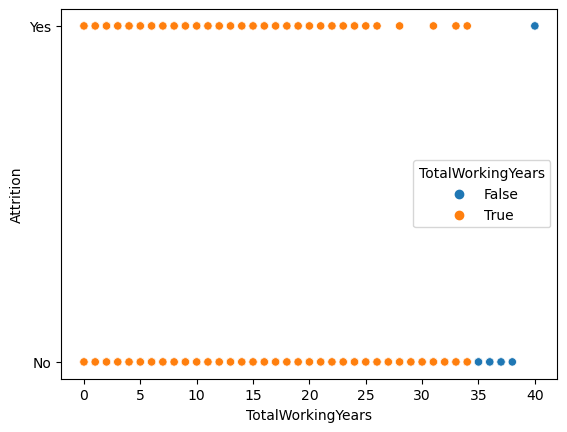

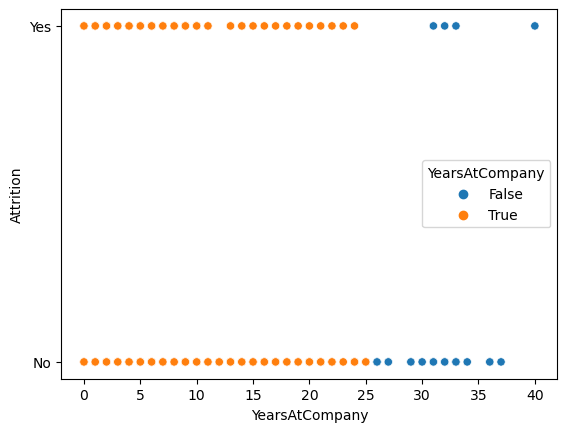

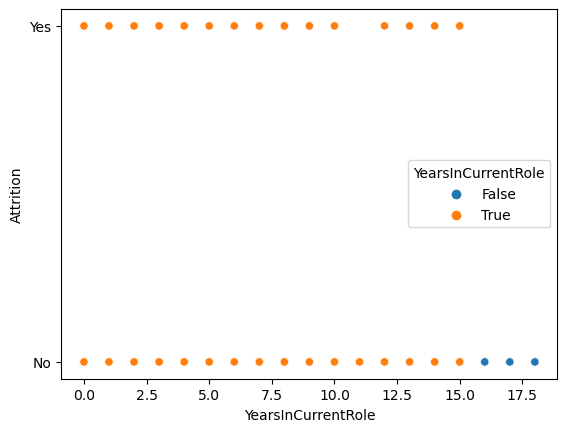

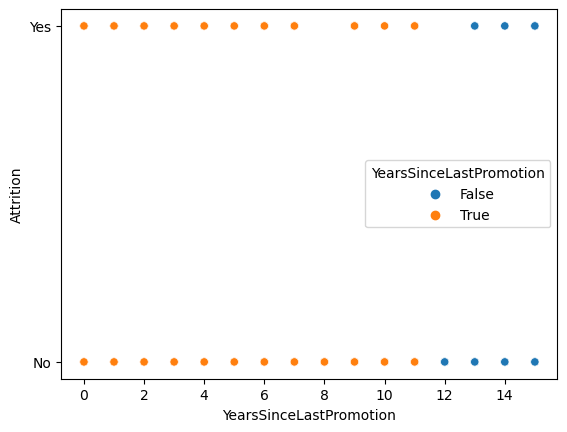

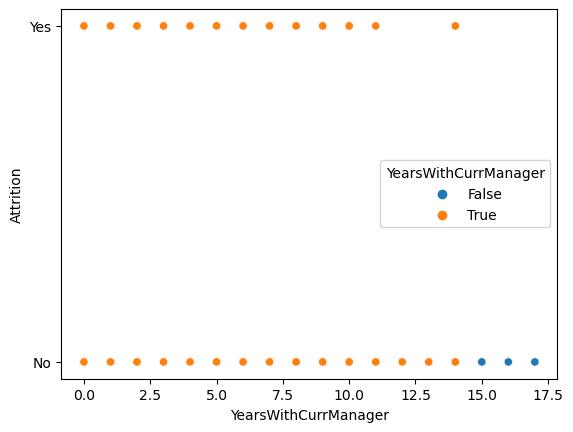

In [23]:
for col in outli_feat_2:
    plt.figure()
    sns.scatterplot(data = df, x = col, y = "Attrition", hue = z_scores_bool[col])

In [24]:
mask = (z_scores_bool[["TotalWorkingYears","YearsInCurrentRole","YearsWithCurrManager"]] == False).any(axis=1)

In [25]:
mask.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: None
Non-Null Count  Dtype
--------------  -----
1470 non-null   bool 
dtypes: bool(1)
memory usage: 1.6 KB


In [26]:
index_zscor_1 = z_scores_bool.loc[mask].index

In [27]:
index_zscor_1

Index([  28,   63,   85,   98,  123,  126,  153,  187,  190,  231,  270,  281,
        386,  401,  445,  466,  561,  595,  616,  624,  635,  686,  716,  746,
        875,  894,  926,  956,  976, 1024, 1043, 1078, 1116, 1184, 1301, 1327,
       1348, 1351, 1401, 1430],
      dtype='int64')

In [28]:
mask_2 = (z_scores_bool[["YearsAtCompany", "YearsSinceLastPromotion"]] == False).any(axis=1)

In [29]:
index_zscor_2 = z_scores_bool.loc[mask_2].index

In [30]:
index_zscor_2

Index([  45,   62,   64,   98,  110,  123,  126,  178,  190,  218,  237,  270,
        326,  386,  411,  425,  427,  473,  477,  535,  561,  584,  592,  595,
        653,  677,  701,  749,  752,  799,  838,  861,  875,  914,  918,  922,
        926,  937,  962,  976, 1008, 1078, 1086, 1093, 1111, 1116, 1135, 1138,
       1156, 1221, 1223, 1242, 1295, 1301, 1303, 1331, 1414],
      dtype='int64')

In [31]:
type(index_zscor_2)

pandas.core.indexes.base.Index

In [32]:
index_drop = index_zscor_2.difference(index_zscor_1)

In [33]:
index_drop

Index([  45,   62,   64,  110,  178,  218,  237,  326,  411,  425,  427,  473,
        477,  535,  584,  592,  653,  677,  701,  749,  752,  799,  838,  861,
        914,  918,  922,  937,  962, 1008, 1086, 1093, 1111, 1135, 1138, 1156,
       1221, 1223, 1242, 1295, 1303, 1331, 1414],
      dtype='int64')

In [34]:
df_cleaned = df.drop(index = index_drop)

In [35]:
df_cleaned.shape

(1427, 31)

# Feature selection

#### Categorical feature

In [77]:
categorical_feat = ["BusinessTravel","Department","Education","EducationField","EnvironmentSatisfaction","Gender","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","OverTime","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]

In [78]:
stat = []

In [79]:
for var in categorical_feat:
    contingency_table = pd.crosstab(df_cleaned[var],df_cleaned["Attrition"])
    chi2 = stats.chi2_contingency(contingency_table)[0]
    p_value = stats.chi2_contingency(contingency_table)[1]
    num_rows, num_cols = contingency_table.shape
    v_cramer = np.sqrt(chi2/(df_cleaned.shape[0]*min(num_rows-1,num_cols-1)))
    stat.append([var,chi2,p_value,v_cramer])

In [80]:
stat_df = pd.DataFrame(stat, columns = ["Variable","Chi2_square","P_value","V_Cramer"])

In [81]:
stat_df.sort_values("P_value", ascending = True, inplace = True)

In [82]:
stat_df

,Variable,Chi2_square,P_value,V_Cramer
11,OverTime,93.199249,4.728606e-22,0.255561
8,JobRole,84.191830,6.979836e-15,0.242897
7,JobLevel,72.402698,7.055254e-15,0.225250
14,StockOptionLevel,58.491661,1.234319e-12,0.202458
10,MaritalStatus,45.234378,1.504803e-10,0.178042
0,BusinessTravel,23.699294,7.141076e-06,0.128871
6,JobInvolvement,26.448292,7.683197e-06,0.136140
4,EnvironmentSatisfaction,23.683606,2.908239e-05,0.128828
9,JobSatisfaction,18.180472,4.037147e-04,0.112873
15,WorkLifeBalance,16.609953,8.500258e-04,0.107888


In [49]:
cat_feature = ["OverTime","JobRole","JobLevel","StockOptionLevel","MaritalStatus","JobInvolvement","BusinessTravel","EnvironmentSatisfaction"]

#### Numerical feature

In [90]:
numerical_feat = ["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [91]:
stat_2 = []

In [92]:
for var in numerical_feat:
    U_stat, p_value1 = stats.mannwhitneyu(df_cleaned[df_cleaned['Attrition'] == 'Yes'][var], df_cleaned[df_cleaned['Attrition'] == 'No'][var])
    stat_2.append([var,U_stat,p_value1])

In [93]:
stat_2_df = pd.DataFrame(stat_2, columns =["Variable","U_stat","P_value"])

In [94]:
stat_2_df.sort_values("P_value", ascending = True, inplace = True)

In [95]:
stat_2_df

,Variable,U_stat,P_value
8,TotalWorkingYears,93613.0,6.970565e-15
4,MonthlyIncome,94514.5,2.783687e-14
10,YearsAtCompany,95316.0,6.538484e-14
11,YearsInCurrentRole,98105.0,1.433243e-12
13,YearsWithCurrManager,98371.0,2.165485e-12
0,Age,100206.0,3.600712e-11
2,DistanceFromHome,155072.0,3.040695e-03
1,DailyRate,125811.5,3.157907e-02
12,YearsSinceLastPromotion,127082.0,4.399942e-02
9,TrainingTimesLastYear,128234.5,7.016677e-02


In [96]:
stat_3 = []

In [97]:
for var in numerical_feat:
    F_stat, p_value2 = stats.f_oneway(df_cleaned[df_cleaned['Attrition'] == 'Yes'][var], df_cleaned[df_cleaned['Attrition'] == 'No'][var])
    stat_3.append([var,F_stat,p_value2])

In [98]:
stat_3_df = pd.DataFrame(stat_3, columns =["Variable","F_stat","P_value"])

In [99]:
stat_3_df.sort_values("P_value", ascending = True, inplace = True)

In [100]:
stat_3_df

,Variable,F_stat,P_value
8,TotalWorkingYears,48.069133,6.217989e-12
11,YearsInCurrentRole,43.001183,7.630411e-11
13,YearsWithCurrManager,42.182668,1.145523e-10
4,MonthlyIncome,39.988937,3.410228e-10
0,Age,37.931480,9.512732e-10
10,YearsAtCompany,34.380890,5.623381e-09
2,DistanceFromHome,8.956174,2.812909e-03
1,DailyRate,4.578648,3.254218e-02
9,TrainingTimesLastYear,4.284812,3.863415e-02
6,NumCompaniesWorked,3.322535,6.854584e-02


In [101]:
num_feature = ["TotalWorkingYears","YearsInCurrentRole","YearsWithCurrManager","MonthlyIncome","Age","YearsAtCompany"]

In [103]:
df_fselect = df_cleaned[["Attrition"] + cat_feature + num_feature]

In [105]:
df_fselect.head(20)

,Attrition,OverTime,JobRole,JobLevel,StockOptionLevel,MaritalStatus,JobInvolvement,BusinessTravel,EnvironmentSatisfaction,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,MonthlyIncome,Age,YearsAtCompany
0,Yes,Yes,Sales Executive,2,0,Single,3,Travel_Rarely,2,8,4,5,5993,41,6
1,No,No,Research Scientist,2,1,Married,2,Travel_Frequently,3,10,7,7,5130,49,10
2,Yes,Yes,Laboratory Technician,1,0,Single,2,Travel_Rarely,4,7,0,0,2090,37,0
3,No,Yes,Research Scientist,1,0,Married,3,Travel_Frequently,4,8,7,0,2909,33,8
4,No,No,Laboratory Technician,1,1,Married,3,Travel_Rarely,1,6,2,2,3468,27,2
5,No,No,Laboratory Technician,1,0,Single,3,Travel_Frequently,4,8,7,6,3068,32,7
6,No,Yes,Laboratory Technician,1,3,Married,4,Travel_Rarely,3,12,0,0,2670,59,1
7,No,No,Laboratory Technician,1,1,Divorced,3,Travel_Rarely,4,1,0,0,2693,30,1
8,No,No,Manufacturing Director,3,0,Single,2,Travel_Frequently,4,10,7,8,9526,38,9
9,No,No,Healthcare Representative,2,2,Married,3,Travel_Rarely,3,17,7,7,5237,36,7


# Encoding